__Data description:__ https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [9]:
sns.set_style('white')

PATH = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
df = pd.read_csv(PATH)

print(df.head())
print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


## Fun with categorical variables

In [10]:
#making dummies & creating df to hold features
features = pd.get_dummies(df['cntry'])

#Nordic countries dummy
features['Nordic'] = np.where((df['cntry'].isin(['NO','SE',])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


## Changing variable types

In [11]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

#check to make sure it worked
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


## Drill

Categorize each of the variables in the ESS dataset as categorical or continuous, and if continuous as ordinal, interval, or ratio variables

cntry - categorical

idno - continuous interval

year - categorical

tvtot - categorical

ppltrst - categorical

pplfair - categorical

pplhlp - categorical

happy - categorical

sclmeet - categorical

sclact - categorical

gndr - categorical

agea - continuous ratio

partner - categorical


## Combining two or more highly-correlated variables

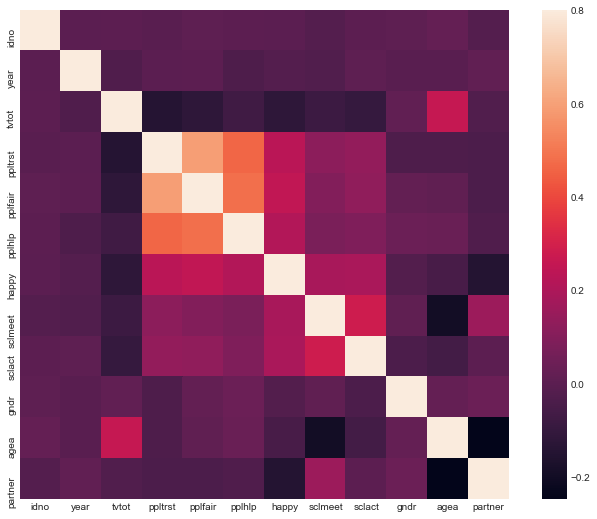

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [12]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

#pplfair, ppltrst, pplhlp are closely correlated (redundant) -> average them
#To handle variables on different scales ie on is 0 to 100, another is 0 to 7
    #scale them by subtracting the average of each variable from all values in that
    #variable and divide by standard deviation

means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

#check how well the composite correlates with each of the individual variables
plotdf = df.loc[:, ['ppltrst','pplfair','pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()

print(corrmat2)

## Dealing with non-normality

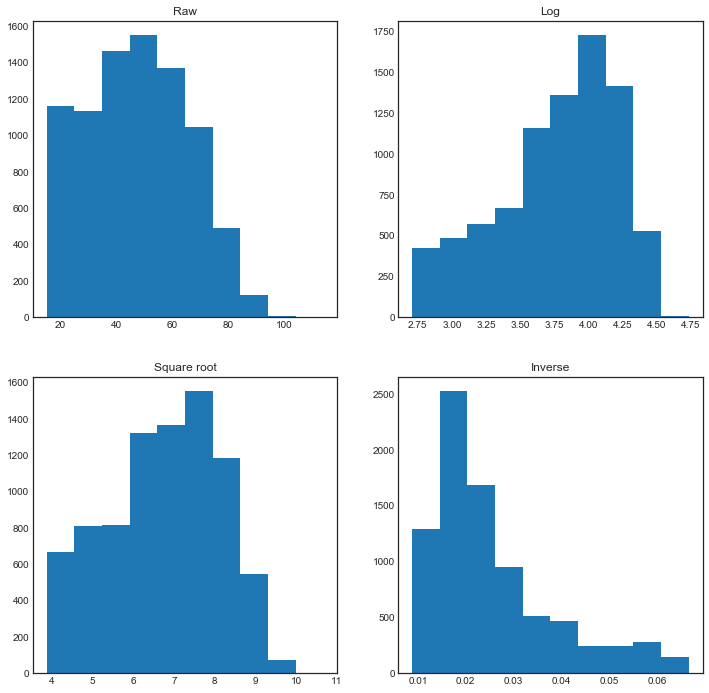

In [16]:
# making a four panel plot

fig = plt.figure(figsize=(12,12))

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')

plt.show()

#none of these transformations look particularly great, but let's make a feature from the log one

features['log_age'] = np.log(df['agea'])

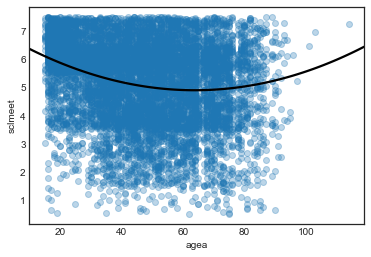

In [17]:
sns.regplot(df['agea'],
            y=df['sclmeet'],
            y_jitter=.49,
            order=2,
            scatter_kws={'alpha':0.3},
            line_kws={'color':'black'},
            ci=None)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

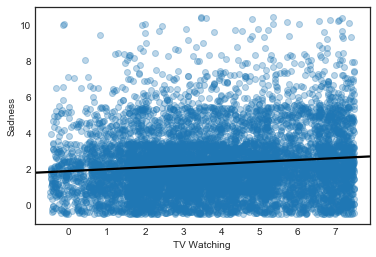

In [18]:
#reverse coding the happy variable so that higher scores mean less happiness (and possibly more sadness)

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(df['tvtot'],
           features['Sadness'],
           x_jitter=.49,
           y_jitter=.49,
           scatter_kws={'alpha':0.3},
           line_kws={'color':'black'},
           ci=None)

plt.xlabel('TV Watching')
plt.ylabel('Sadness')
plt.show()

## Leveling the playing field

In [19]:
from sklearn import preprocessing

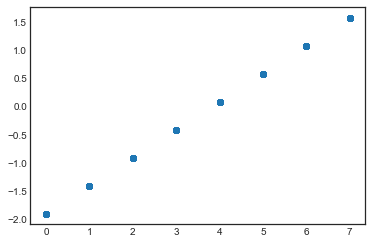

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -4.888824e-19 -2.645920e-15 -7.836428e-16 -7.257574e-15 -6.105886e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -8.793070e-17  2.377904e-15 -1.101365e-15 -2.058798e-15 -3.414477e-15   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [20]:
#select only numeric variables to scale
df_num = df.select_dtypes(include=[np.number]).dropna()

#save column names
names = df_num.columns

#scale then turn resulting numpy array back into a data from with correct column names
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

#the new features contain all the information from the old ones, but on a new scale
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

#matching means and standard deviations
print(df_scaled.describe())

## All about interactions

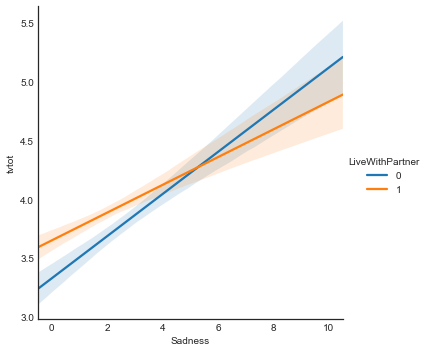

In [22]:
#create a better indicator for 'partner', currently coded 1 for living with partner, 2 for not
features['LiveWithPartner'] = np.where(df['partner'] == 1,1,0)

#create the interaction
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

#plot of an interaction
#add tvtot feature to the features df for plotting
features['tvtot'] = df['tvtot']

sns.lmplot(x='Sadness',
           y='tvtot',
           hue='LiveWithPartner',
           data=features,
           scatter=False)

plt.show()